<a href="https://colab.research.google.com/github/PoppyDalamaZain/Kelompok3/blob/main/worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Mining Kelompok 3

Ketua : Ahnaf Dzakwan Akbari (11200940000061)

Anggota : 

- Firdha Wulandari (11200940000020)
- Fida Suci Rahmani (11190940000027)
- Poppy Dalama Zain (11200940000042)
- Muhammad Dzakiy (11200940000056)


#Import Packages



In [18]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-12 05:46:44--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-12 05:46:44 (150 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from datetime import datetime
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

#Memanggil Data

In [20]:
 # Running in Google Colab
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/PoppyDalamaZain/Kelompok3/main/data/Case-Study-02-MixITup_.csv
df = pd.read_csv("data/Case-Study-02-MixITup_.csv", low_memory = False, encoding='utf8')
    
df.shape

mkdir: cannot create directory ‘data’: File exists
--2022-10-12 05:46:45--  https://raw.githubusercontent.com/PoppyDalamaZain/Kelompok3/main/data/Case-Study-02-MixITup_.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9296 (9.1K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup_.csv.6’

Case-Study-02-MixIT 100%[===================>]   9.08K  --.-KB/s    in 0s      

2022-10-12 05:46:45 (98.6 MB/s) - ‘data/Case-Study-02-MixITup_.csv.6’ saved [9296/9296]



(200, 10)

In [21]:
df.head

<bound method NDFrame.head of       ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  Menikah  \
0    101        Wanita    49              13114754                52        1   
1    102        Wanita    32              33606557                86        1   
2    103          Pria    51              15983606                41        1   
3    104          Pria    19              12704918                55        0   
4    105        Wanita    38              20081967                42        1   
..   ...           ...   ...                   ...               ...      ...   
195  296          Pria    31               4098360                73        1   
196  297          Pria    57              15983606                51        1   
197  298        Wanita    35              43032786                79        1   
198  299        Wanita    23               1229508                94        1   
199  300          Pria    50               1639344                14        1  

#Melihat Variabel

In [22]:
df.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

#Jumlah Baris dan Kolom pada data

In [23]:
B, K = df.shape
print('Baris = ', B, ', Kolom = ', K)

Baris =  200 , Kolom =  10


#Melihat Tipe dari setiap Variabel

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    200 non-null    int64 
 1   Jenis Kelamin         200 non-null    object
 2   Umur                  200 non-null    int64 
 3   Pendapatan-per-bulan  200 non-null    int64 
 4   skor-pengeluaran      200 non-null    int64 
 5   Menikah               200 non-null    int64 
 6   Kota                  200 non-null    object
 7   Promo                 200 non-null    int64 
 8   HariFav               200 non-null    object
 9   FavFlavor             200 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 15.8+ KB


#Mengubah object menjadi kategorik

In [25]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
#df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
#df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
#df['FavFlavor'] = df['FavFlavor'].astype('category')


#Menghapus variabel yang tidak diperlukan

In [26]:
data_baru = df.drop(columns = ['ID'])
data_baru

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


#mengecek kekosongan nilai

In [27]:
data_baru.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

MENGISI MISSING VALUE DI EXCELL
Keterangan :
1. Missing Value di Variabel Gender diisi dengan Wanita (berdasarkan modus)
2. Missing Value di Variabel Menikah diisi dengan angka "1" yang berarti Menikah (berdasarkan modus)
3. Missing Value di Variabel Promo diisi dengan angka "1" yang berati Jarang (berdasarkan modus)
4. Pada Variabel FavFlavor menggati angka "9" dengan angka "0" karena di Data Understanding tidak terdapat angka "9" (berdasarkan modus)
5. Pada Variable FavFlavor terdapat angka "2" namun pada Data Understanding tidak adanya angka "2", lalu disini kita mengasumsikan bahwa angka "2" ada namun di Data Understanding terhapus atau hilang

#Pengecekan Kembali

In [28]:
data_baru.duplicated().sum()

0

#DATA SUDAH SIAP

In [29]:
data_baru

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


#VISUALISASI EDA

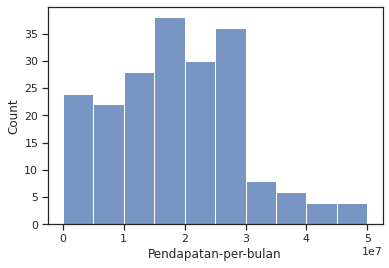

In [30]:
sns.histplot(data=data_baru, x='Pendapatan-per-bulan')

Berdasarkan tabel diatas dapat dilihat bahwa range pendapatan customer banyak tersebar di antara 0 sampai 30 juta.

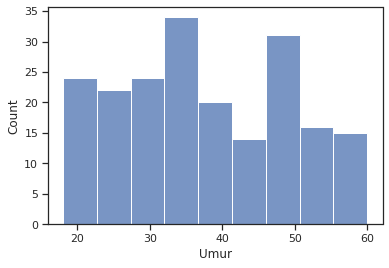

In [31]:
sns.histplot(data=data_baru, x='Umur')

1. Berdasarkan plot di atas dapat di lihat bahwa paling banyak pembeli berumur antara 30 sampai 40.
2. Sedangkan paling rendah range antara umur 50 sampai 60.
3. pada plot diatas terdapat hal menarik karena adanya peminat cukup tinggi pembelian es krim di range umur 50 sampai 60 yang notabennya pembelian es krim ditujukan untuk anak anak muda.

Disarankan untuk perusahaan MixIUp, untuk mempromosikan produknya kepada masyarakat luas.

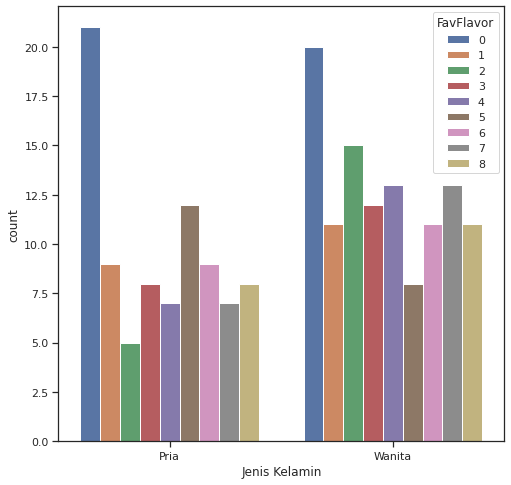

In [44]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="Jenis Kelamin", hue="FavFlavor", data=data_baru)

Produk MIXITUP yang paling banyak diminati dikalangan pria dan wanita yaitu es krim rasa Vanilla, karena rasa Vanilla memiliki cita rasa yang khas dan cocok dipadukan dengan cita rasa lainnya.
Sedangkan untuk es krim rasa Matcha kurang diminati dikalangan pria dan untuk eskrim rasa BubbleGum/Cotton Candy kurang diminati dikalangan wanita.
Karena rasa Matcha dan BubbleGum/Cotton Candy merupakan rasa baru yang asing di lidah *customer* MIXITUP.

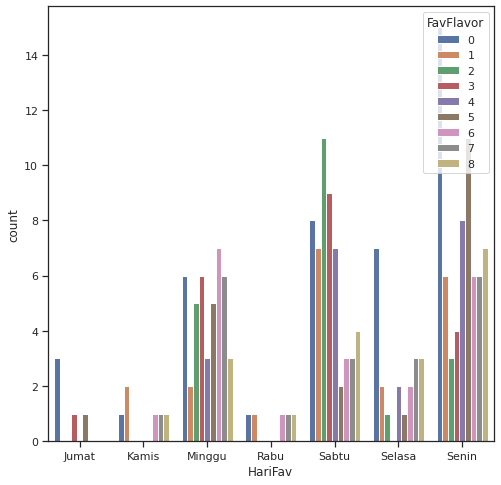

In [33]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="HariFav", hue="FavFlavor", data=data_baru)

Untuk meningkatkan penjualan, kami rekomendasikan:
- Diadakan promo untuk rasa selain vanila, coklat, dan bubblegum/cottoncandy pada hari Jum'at
- Diadakan promo untuk rasa selain vanila, strawberry, coconut, caramel pecan, dan mix flavors pada hari Kamis
- Diadakan promo untuk rasa selain vanila, strawberry, coconut, caramel pecan, dan mix flavors pada hari Rabu

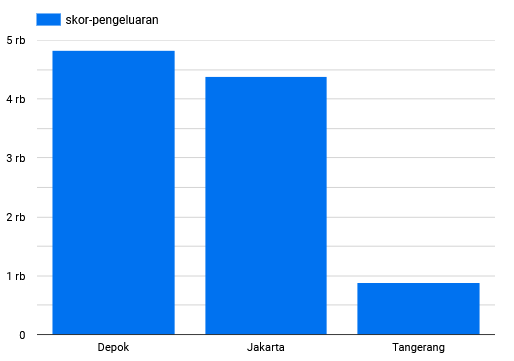

Menurut data yang dimiliki oleh MixItUp,  pelanggan yang berasal dari daerah Depok memberi paling banyak keuntungan disusul oleh Jakarta sedangkan daerah Tangerang masih memiliki sedikit keuntungan. Rekomendasi yang kami berikan berdasarkan data tersebut untuk pembukaan cabang baru yaitu agar MixItUp sebaiknya membuka cabang di daerah Depok.

#Menentukan Clustering pada Data

In [52]:
df = data_baru
X = df[['skor-pengeluaran', 'Umur']]#.values
C = df['Kota']#.values
print(X.shape)
df.sample(7)

(200, 2)


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,Wanita,44,25819672,20,1,Tangerang,3,Sabtu,0
122,Wanita,34,36065573,23,1,Tangerang,3,Senin,1
113,Pria,52,3278688,29,1,Tangerang,3,Sabtu,0
14,Wanita,58,2049180,15,1,Tangerang,5,Sabtu,8
61,Pria,46,19672131,52,1,Jakarta,1,Kamis,1
103,Wanita,42,20491803,43,1,Jakarta,2,Sabtu,4
186,Wanita,46,4098360,5,1,Tangerang,3,Senin,7


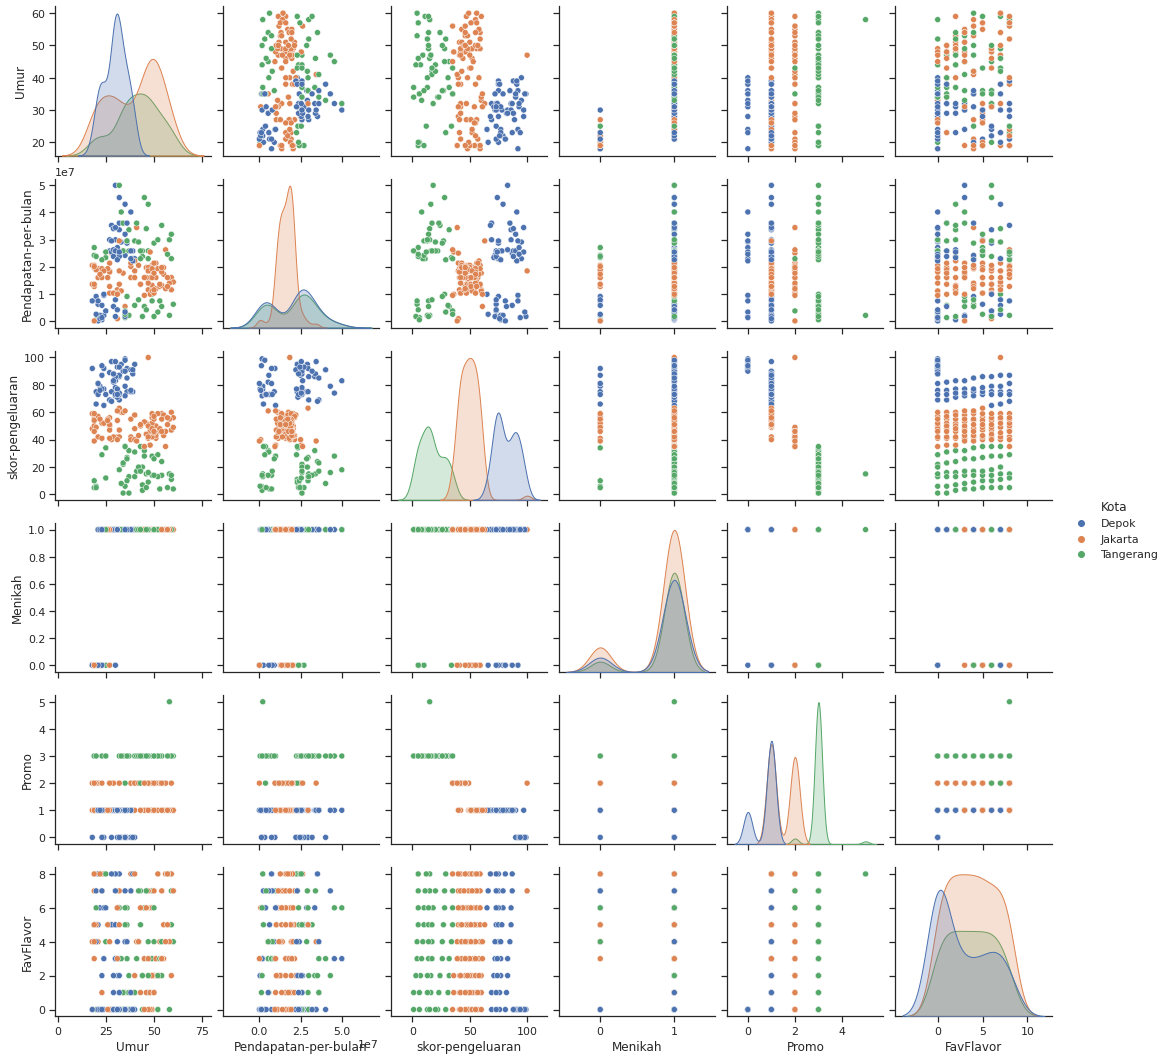

In [53]:
g = sns.pairplot(df, hue="Kota")

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

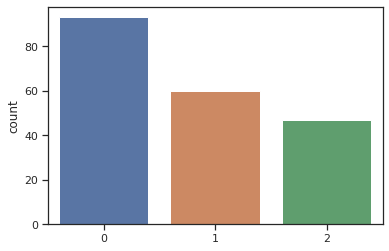

In [73]:
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(C_kmpp)
C_kmpp[:10]


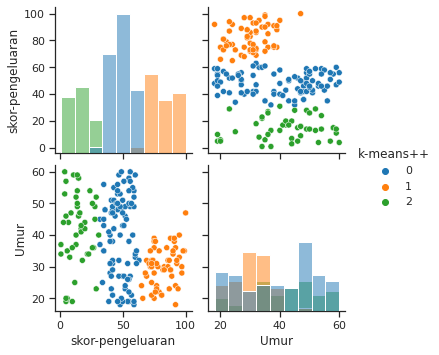

In [69]:
df['k-means++'] = C_kmpp
g = sns.pairplot(df[['skor-pengeluaran', 'Umur','k-means++']], 
                 hue="k-means++", diag_kind="hist", palette="tab10")

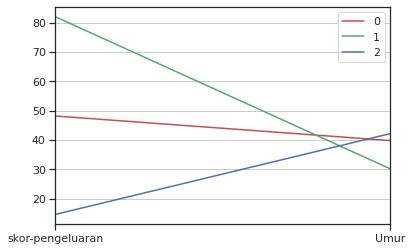

In [70]:
cols = ['skor-pengeluaran', 'Umur']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

Berdasarkan plot diatas Klester 0 cenderung lebih merata, sedangkan klaster 1 terlihat pengeluaran lebih besar namun umur customur cenderung lebih muda karen es krim lebih diminati oleh customer muda, dan pada klaster 2 dapat di lihat bahwa pengeluaran lebih sedikit dan umur cutomer cenderung lebih tua, karena orang tua jarang membeli es krim.


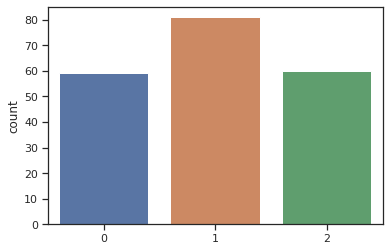

In [40]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, 
                    random_state = 99)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)